In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
sm = "NGC6819.massSamples"
mem = "NGC6819.membership"
ph = "NGC6819.phot"

In [13]:
phot = pd.read_csv(ph, sep='\s+')
phot['m1Mean'] = -1
phot['m1Std'] = -1
phot['m2Mean'] = -1
phot['m2Std'] = -1
phot['qMean'] = -1
phot['qStd'] = -1
phot['memMean'] = -1
phot['memStd'] = -1
phot['member'] = False
phot['binary'] = False
phot


,id,g_ps,r_ps,i_ps,z_ps,y_ps,sigg_ps,sigr_ps,sigi_ps,sigz_ps,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,100300001,12.0640,11.9650,10.1610,9.0880,8.5260,0.0100,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1,108640002,13.2814,10.9032,9.0598,8.5864,8.8477,0.0100,0.0423,0.0100,0.0100,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2,109210003,99.9000,99.9000,99.9000,99.9000,99.9000,-9.9000,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
3,111380004,99.9000,99.9000,99.9000,99.9000,99.9000,-9.9000,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
4,100210005,99.9000,99.9000,99.9000,99.9000,99.9000,-9.9000,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,122942576,21.5337,20.9281,20.6569,20.4802,20.2391,0.0226,0.0325,0.0453,0.0315,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2576,115232577,21.4135,20.8601,20.6260,20.5151,20.1972,0.0433,0.0396,0.0422,0.2331,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2577,116102578,21.4914,20.6895,20.4278,20.3339,19.9900,0.0442,0.0507,0.0304,0.0701,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2578,113912579,22.1363,20.9247,20.4499,20.0596,19.7728,0.0100,0.0518,0.0437,0.0609,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False


In [14]:
# should we exclude all the rows with negative sig values?
# no, we should probably include them since they are in the cluster
#
# phot = phot.loc[(phot['sigg_ps'] > 0) & (phot['sigr_ps'] > 0) & (phot['sigi_ps'] > 0) \
#                 & (phot['sigz_ps'] > 0) & (phot['sigy_ps'] > 0)]
# phot

In [26]:
# get the names for the masses
massesNames = np.loadtxt(sm,max_rows = 1, dtype=str)
massesNames = np.char.replace(massesNames,'mass','')
massesNames = np.char.replace(massesNames,'ratio','')
massesNames = (massesNames[massesNames != ''])
massesNames

['108550067',
 '108550067',
 '109430068',
 '109430068',
 '102250069',
 '102250069',
 '109950070',
 '109950070',
 '105470071',
 '105470071',
 '101310072',
 '101310072',
 '108590073',
 '108590073',
 '100200074',
 '100200074',
 '104210075',
 '104210075',
 '111600076',
 '111600076',
 '110310077',
 '110310077',
 '100670078',
 '100670078',
 '100840079',
 '100840079',
 '100350080',
 '100350080',
 '101040081',
 '101040081',
 '113660082',
 '113660082',
 '113030083',
 '113030083',
 '107620084',
 '107620084',
 '108440085',
 '108440085',
 '103070086',
 '103070086',
 '109590087',
 '109590087',
 '108150088',
 '108150088',
 '110500089',
 '110500089',
 '109760090',
 '109760090',
 '101160091',
 '101160091',
 '109390092',
 '109390092',
 '104870093',
 '104870093',
 '101990094',
 '101990094',
 '104340095',
 '104340095',
 '110520096',
 '110520096',
 '113960097',
 '113960097',
 '100950098',
 '100950098',
 '100220099',
 '100220099',
 '101800100',
 '101800100',
 '101240101',
 '101240101',
 '101360102',
 '1013

In [23]:
# get the masses
masses = np.loadtxt(sm,skiprows=1)
print(masses.shape)
print(masses.shape[1]/2.)

(10000, 1276)
638.0


In [24]:
# get the memberships 
membership = np.loadtxt(mem)
print(membership.shape)

(10000, 638)


In [27]:
#calculate the binary fraction
nBinary = 0
nCluster = 0
for i in range(0,masses.shape[1],2):
    # get the row in the phot file
    iden = int(massesNames[i])
    row = phot.loc[(phot['id'] == iden)]
    #print(row['id'])
    
    # get the column in the membership file
    imem = int(i/2)
    memArr = membership[:,imem]
    memMean = np.mean(memArr)
    memStd = np.std(memArr)
    
    # add to the phot df
    phot.at[row.index[0], 'memMean'] = memMean
    phot.at[row.index[0], 'memStd'] = memStd
    
    if (memMean - 3*memStd > 0):
        phot.at[row.index[0], 'member'] = True

        nCluster += 1
        
        # get the masses
        m1Arr = masses[:,i]
        qArr = masses[:,(i + 1)]
        m2Arr = m1Arr*qArr
        m2Mean = np.mean(m2Arr)
        m2Std = np.std(m2Arr)
        qMean = np.mean(qArr)
        qStd = np.std(qArr)
        
        # add to the phot df masses (to do)
        phot.at[row.index[0], 'qMean'] = qMean
        phot.at[row.index[0], 'qStd'] = qStd
    
        if (m2Mean - 3*m2Std > 0):
            nBinary += 1
            phot.at[row.index[0], 'binary'] = True

            
    #print(m1Arr)   
print(nBinary, nCluster, nBinary/nCluster, np.sqrt(nBinary)/nCluster)

146 444 0.32882882882882886 0.027214067508095883


In [28]:
phot

,id,g_ps,r_ps,i_ps,z_ps,y_ps,sigg_ps,sigr_ps,sigi_ps,sigz_ps,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,100300001,12.0640,11.9650,10.1610,9.0880,8.5260,0.0100,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,False,False
1,108640002,13.2814,10.9032,9.0598,8.5864,8.8477,0.0100,0.0423,0.0100,0.0100,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,False,False
2,109210003,99.9000,99.9000,99.9000,99.9000,99.9000,-9.9000,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,False,False
3,111380004,99.9000,99.9000,99.9000,99.9000,99.9000,-9.9000,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,False,False
4,100210005,99.9000,99.9000,99.9000,99.9000,99.9000,-9.9000,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,122942576,21.5337,20.9281,20.6569,20.4802,20.2391,0.0226,0.0325,0.0453,0.0315,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,False,False
2576,115232577,21.4135,20.8601,20.6260,20.5151,20.1972,0.0433,0.0396,0.0422,0.2331,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,False,False
2577,116102578,21.4914,20.6895,20.4278,20.3339,19.9900,0.0442,0.0507,0.0304,0.0701,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,False,False
2578,113912579,22.1363,20.9247,20.4499,20.0596,19.7728,0.0100,0.0518,0.0437,0.0609,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,False,False


(22.0, 13.0)

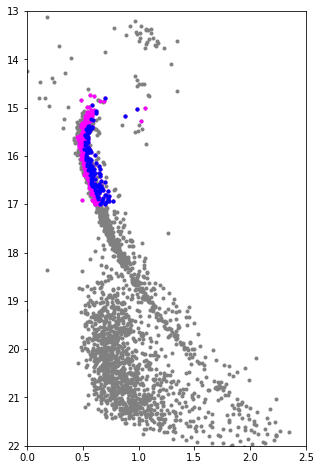

In [29]:
f, ax = plt.subplots(figsize=(5,8))
photMems = phot.loc[phot['member']]
photBinary = phot.loc[phot['binary']]
ax.plot(phot['g_ps'] - phot['i_ps'], phot['g_ps'],'.', color='gray')
ax.plot(photMems['g_ps'] - photMems['i_ps'], photMems['g_ps'],'.', color='magenta')
ax.plot(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'],'.', color='blue')
ax.set_xlim(0, 2.5)
ax.set_ylim(22, 13)

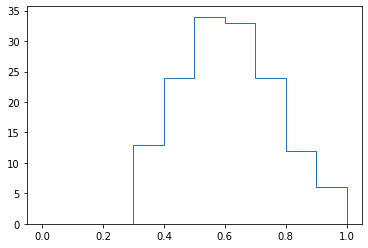

In [30]:
f, ax = plt.subplots()
photBinary = phot.loc[phot['binary']]
_ = ax.hist(photBinary['qMean'], histtype='step', bins=10, range=[0,1])